#### 3. Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


#### 5. How many rows and columns are in gdp_df? What are the data types of each column?
#####   8219 Rows, 4 Columns.
#####   Country or Area has type object.
#####   Year has type int64
#####   Value & Value Footnotes have type float64.

In [4]:
gdp_df.shape

(8219, 4)

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

---
#### Question 6
> *Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.*

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df = gdp_df.rename(columns = { 'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

---
---
#### Task 7 Part A
> *How many countries have data for all years?*  
> 247 Countries have data for every year.

In [7]:
count_years = gdp_df.groupby('Country').count().sort_values(by = 'Year', ascending = False).reset_index()
count_years = count_years[['Country', 'Year']].rename(columns = {'Year' : 'Year Count'})

In [8]:
count_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     247 non-null    object
 1   Year Count  247 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [9]:
count_years[34 == count_years['Year Count']]

,Country,Year Count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34
...,...,...
223,Ghana,34
224,Greece,34
225,Equatorial Guinea,34
226,Grenada,34


---
#### Task 7 Part B
> *Which countries are missing many years of data?*
>  



In [10]:
count_years[34 > count_years['Year Count']]

,Country,Year Count
228,Bhutan,33
229,Somalia,33
230,Syrian Arab Republic,33
231,Tonga,33
232,Lebanon,33
233,Greenland,32
234,West Bank and Gaza,30
235,Serbia,29
236,Montenegro,27
237,San Marino,26


---
#### Task 7 Part C
> *Look at the number of observations per year. What do you notice?*
> There's less observations in the 90s.

In [11]:
gdp_df.Year.value_counts().reset_index().sort_values(by = ["count","Year"])

,Year,count
33,1990,233
32,1991,234
31,1992,234
30,1993,234
29,1994,235
28,1995,236
27,1996,236
26,1997,238
25,1998,238
24,1999,238


---
---
#### Task 8
> In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.  
>  Create a histogram, a density plot, a boxplot, and a violin plot.  
> What do you notice when you look at these plots?  
> How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [12]:
gdp_2020 = gdp_df.loc[2020 == gdp_df.Year]

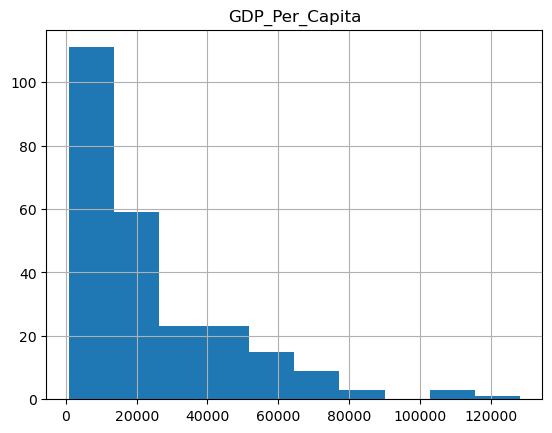

In [13]:
gdp_2020.hist("GDP_Per_Capita");

C:\Users\school\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

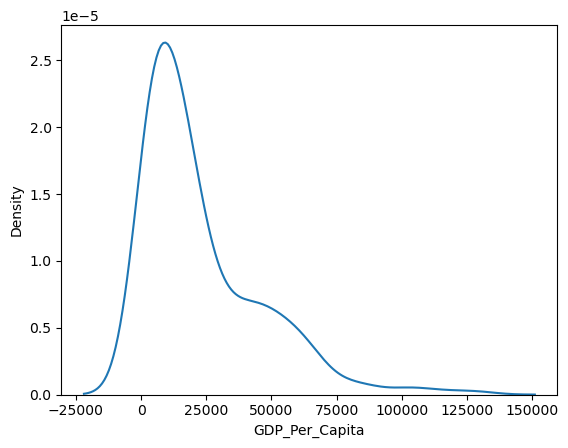

In [28]:
sns.kdeplot(data = gdp_2020, x= "GDP_Per_Capita")

<Axes: >

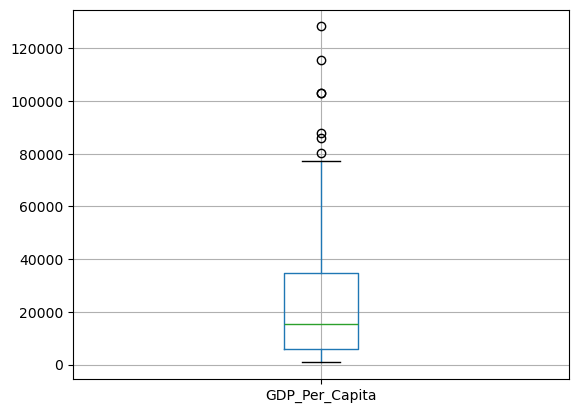

In [15]:
gdp_2020.boxplot("GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

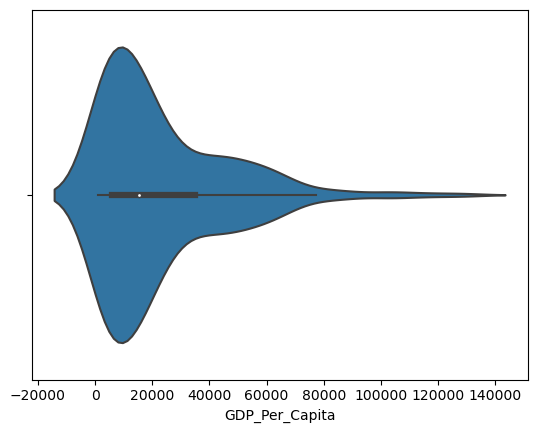

In [16]:
sns.violinplot(data = gdp_2020, x = "GDP_Per_Capita")

#### 9

In [20]:
gdp_2020.GDP_Per_Capita.median()

15309.23598817024

# loading internet use 

In [26]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows = 6083)

In [27]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4
